1. Veriyi okuma

In [45]:
import pandas as pd

# Verileri yükle
X_train = pd.read_csv("datasets/X_train.csv")
X_test = pd.read_csv("datasets/X_test.csv")
y_train = pd.read_csv("datasets/y_train.csv").values.ravel()
y_test = pd.read_csv("datasets/y_test.csv").values.ravel()

2. CART (GINI ve Entropi)

In [46]:
from sklearn.tree import DecisionTreeClassifier

# GINI
cart_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_gini.fit(X_train, y_train)
y_pred_gini = cart_gini.predict(X_test)

# Entropy
cart_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
cart_entropy.fit(X_train, y_train)
y_pred_entropy = cart_entropy.predict(X_test)

3. SMOTE ile veri dengesizliğini giderme

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

4. Rastgele orman

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

5. Performans metrikleri

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()  # binary olduğu için direkt açabiliriz

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = TN / (TN + FP)
    f1 = f1_score(y_true, y_pred)

    # Matris çizimi
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Karmaşıklık Matrisi")
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.show()

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": recall,
        "Specificity": specificity,
        "F1 Score": f1
    }

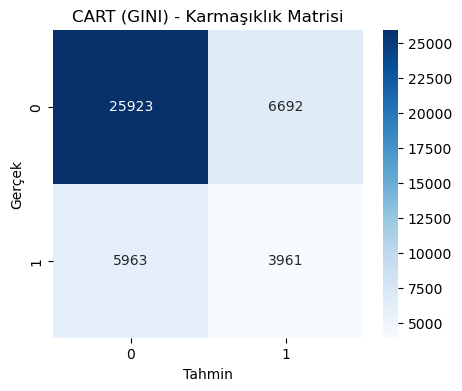

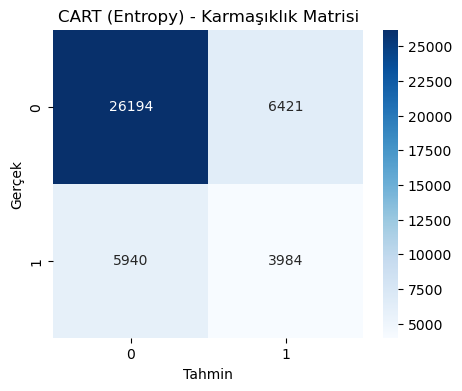

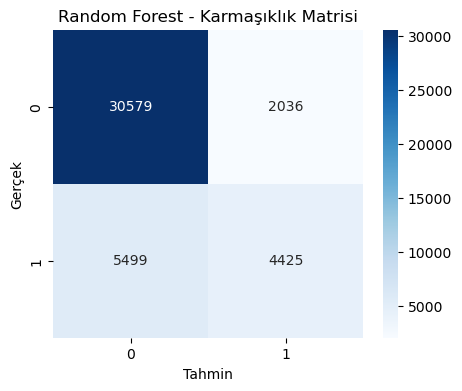

,Accuracy,Precision,Recall,Specificity,F1 Score
CART (GINI),0.702508,0.371820,0.399133,0.794818,0.384993
CART (Entropy),0.709420,0.382893,0.401451,0.803127,0.391952
Random Forest,0.822868,0.684879,0.445889,0.937575,0.540128


In [50]:
# Modelleri değerlendir
results = {
    "CART (GINI)": evaluate_model(y_test, y_pred_gini, "CART (GINI)"),
    "CART (Entropy)": evaluate_model(y_test, y_pred_entropy, "CART (Entropy)"),
    "Random Forest": evaluate_model(y_test, y_pred_rf, "Random Forest")
}

results_df = pd.DataFrame(results).T
display(results_df)

6. Roc Eğrisi

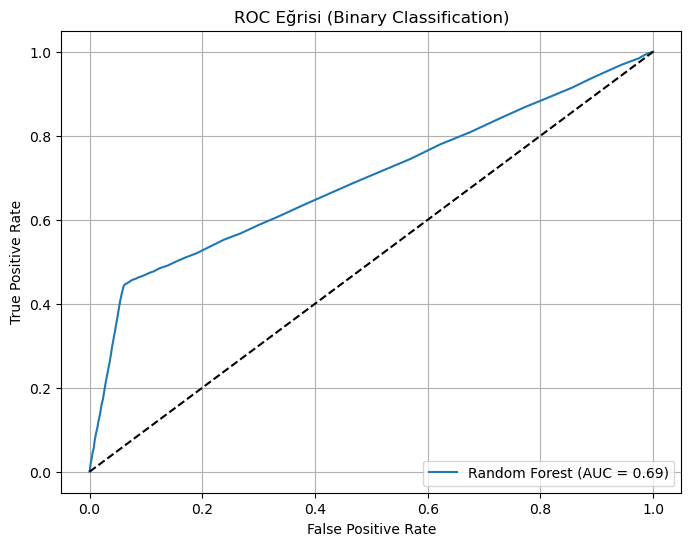

In [51]:
from sklearn.metrics import roc_curve, auc

# ROC için olasılık tahmini
y_score_rf = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi (Binary Classification)")
plt.legend(loc="lower right")
plt.grid()
plt.show()